In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
dane = pd.read_csv('../DataIn/004_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna
y = y.reshape(-1, 1) # na tablicę dwuwymiarową dla StandardScaler()

In [3]:
# Normalizowanie danych, żeby oscylowały w podobnych wielkościach X i y, średnia 0 i oscylacja 1
# Jest to potrzebne w przypadku kiedy występuje duża różnica w wielkościach danych np. X jest w przedziale 0-100, a y 100000-4000000,
# przy SVR najlepiej normalizować zawsze.
X_scaler = StandardScaler() # stworzenie obiektów normalizacji
y_scaler = StandardScaler()
X_norm = X_scaler.fit_transform(X) # normalizacja
y_norm = y_scaler.fit_transform(y)

In [4]:
model_linear = SVR(kernel='linear', tol=0.001, C=100.0, epsilon=0.1)
# tol -> Określa dokładność wymaganej optymalizacji, co wpływa na kryterium zatrzymania.
# C -> Określa, jak bardzo model powinien unikać błędów. Wyższa wartość oznacza mniej regularyzacji (ściślejsze dopasowanie), mniejsza wartość oznacza więcej regularyzacji (ogólniejsze dopasowanie).
# epsilon -> Umożliwia pewne błędy w marginesie epsilon, co pozwala na elastyczność w dopasowaniu do danych.
model_linear.fit(X_norm, y_norm.ravel()) # ravel spłaszcza tablice y do jednego wymiary, wymagania dla fit

SVR(C=100.0, kernel='linear')

In [5]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = (max(X)-min(X)/2))
X_in = np.linspace(np.min(X), np.max(X), int((np.max(X)-np.min(X))/2)) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
# przygotowanie danych do wyświetlania i powrót z danych znormalizowanych do pierwotnych
X_norm = X_scaler.transform(X_in) # normalizacja nowo stworzonych X

In [6]:
prognoza_norm_linear = model_linear.predict(X_norm) # prognozowanie na danych znormalizowanych
prognoza_norm_linear = prognoza_norm_linear.reshape(-1,1) # konwersja do tablicy dwuwymiarowej 
prognoza_linear = y_scaler.inverse_transform(prognoza_norm_linear) # powrót do danych nieznormalizowanychplt.scatter(X, y, color='red')

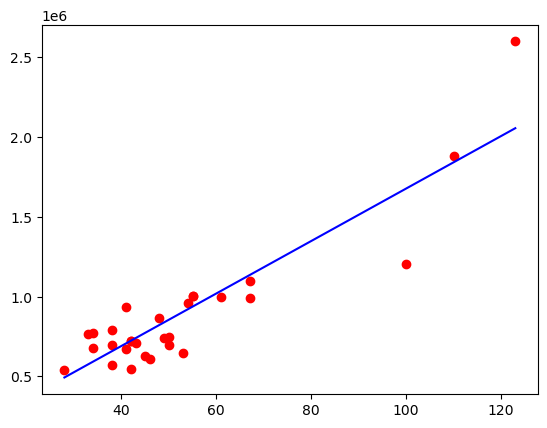

In [7]:
plt.scatter(X, y, color='red')
plt.plot(X_in, prognoza_linear, color='blue') 
plt.show()